# Visualizing Earnings Based on College Majors

In this project, We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Using visualizations, we explore questions from the dataset like:

- Do students in more popular majors make more money? Using scatter plots
- How many majors are predominantly male? Predominantly female? Using histograms
- Which category of majors have the most students? Using bar plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

We generate summary statistics for all the numeric columns by using the describe function on the dataframe

## Data Cleaning

In [4]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [5]:
recent_grads = recent_grads[pd.notnull(recent_grads["Total"])]

In [6]:
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


In the above step, we drop the rows with missing values. We see that there is only one such row in the whole dataframe. We remove it and assign the new dataframe back to recent_grads.

In [7]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Scatter plots to explore correlations between columns

We use the plots to explore the following questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

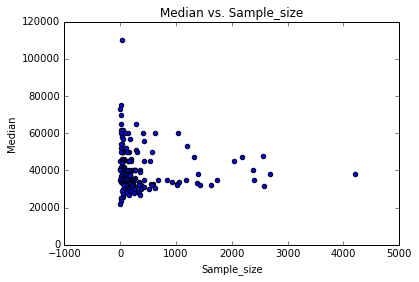

In [8]:
ax1 = recent_grads.plot(x = 'Sample_size',y = 'Median', kind = 'scatter')
ax1.set_title('Median vs. Sample_size')

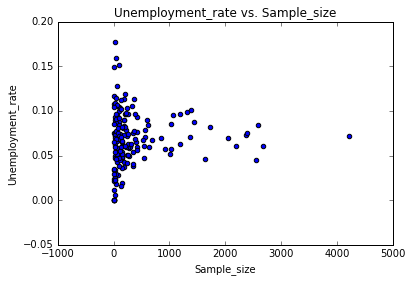

In [9]:
ax2 = recent_grads.plot(x = 'Sample_size',y = 'Unemployment_rate', kind = 'scatter')
ax2.set_title('Unemployment_rate vs. Sample_size')

Studying the scatter plots of Sample_size vs Median and Sample_size vs Unemployment rate, we can make the following observations:

1. There is no apparent correlation between the popularity of the course i.e, sample size(more the sample size more popular the course is) and  Median salary of the students enrolled in the course. This shows that students enrolled in more popular courses do not necessarily make more money.
2. There is a very weak correlation between the popularity of the course and  Unemployment rate among the students enrolled in that course.

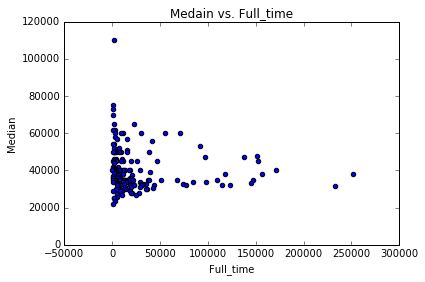

In [10]:
ax3 = recent_grads.plot(x = 'Full_time',y = 'Median', kind = 'scatter')
ax3.set_title('Medain vs. Full_time')

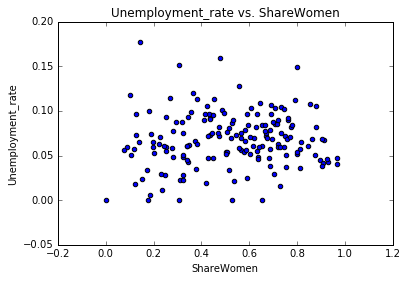

In [11]:
ax4 = recent_grads.plot(x = 'ShareWomen',y = 'Unemployment_rate', kind = 'scatter')
ax4.set_title('Unemployment_rate vs. ShareWomen')

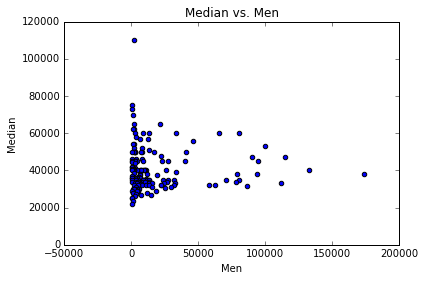

In [13]:
ax5 = recent_grads.plot(x = 'Men',y = 'Median', kind = 'scatter')
ax5.set_title('Median vs. Men')

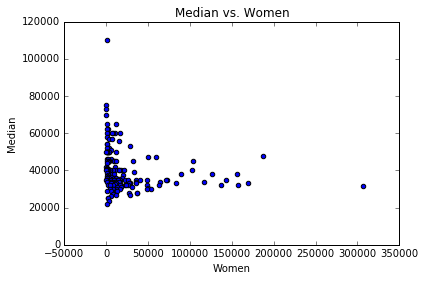

In [14]:
ax6 = recent_grads.plot(x = 'Women',y = 'Median', kind = 'scatter')
ax6.set_title('Median vs. Women')

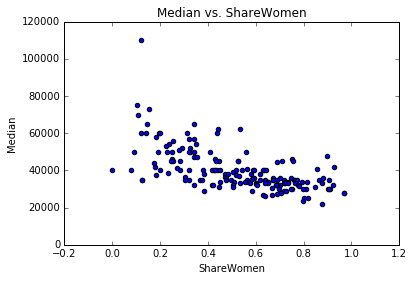

In [15]:
ax6 = recent_grads.plot(x = 'ShareWomen',y = 'Median', kind = 'scatter')
ax6.set_title('Median vs. ShareWomen')

We can see from the above scatter plot that there exists a weak negative correlation between ShareWomen and Median salary. As the share of women increases, the median salary decreases.
This means that students who majored in subjects that were majority female make less money. 

## Exploring distributions using a Histogram

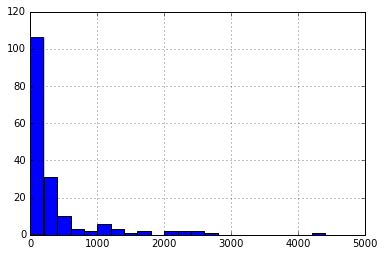

In [35]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

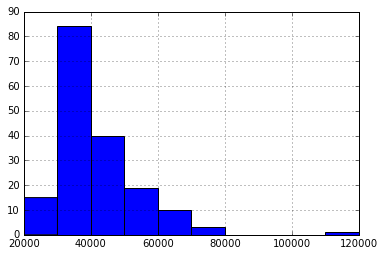

In [17]:
recent_grads['Median'].hist(bins=10, range=(20000,120000))

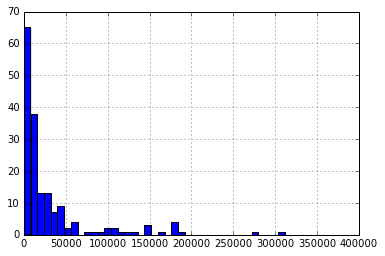

In [18]:
recent_grads['Employed'].hist(bins=50, range=(0,400000))

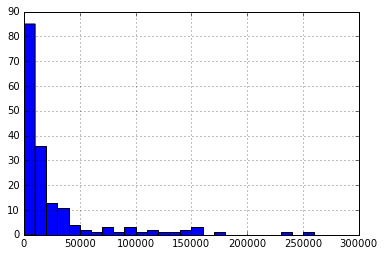

In [19]:
recent_grads['Full_time'].hist(bins=30, range=(0,300000))

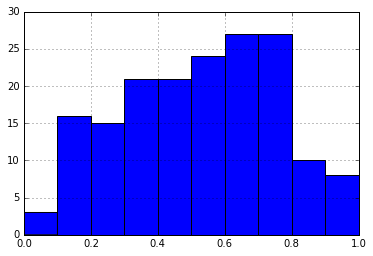

In [20]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

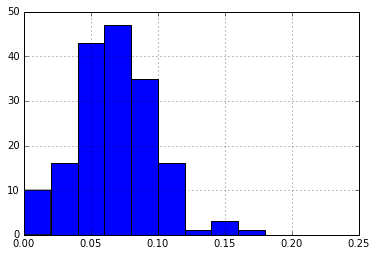

In [21]:
recent_grads['Unemployment_rate'].hist(bins=10, range=(0,0.2))

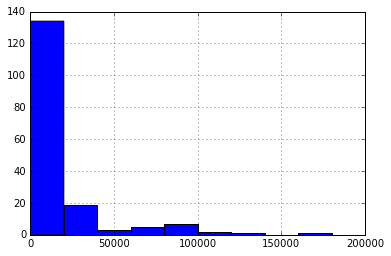

In [22]:
recent_grads['Men'].hist(bins=10, range=(0,200000))

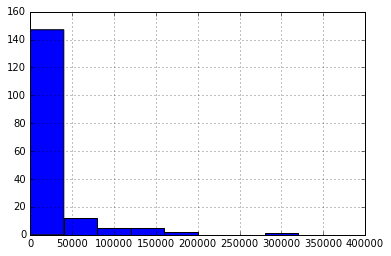

In [23]:
recent_grads['Women'].hist(bins=10, range=(0,400000))

## Scatter Matrix plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce14375cf8>,
      dtype=object)

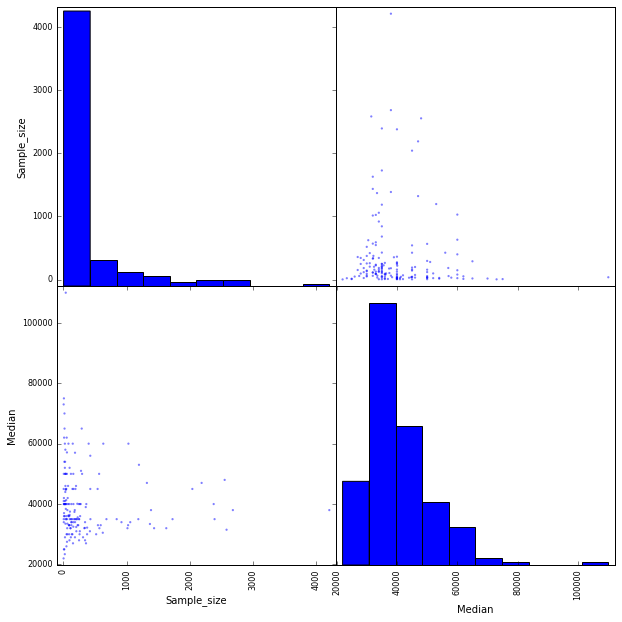

In [24]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce14160da0>,
      dtype=object)

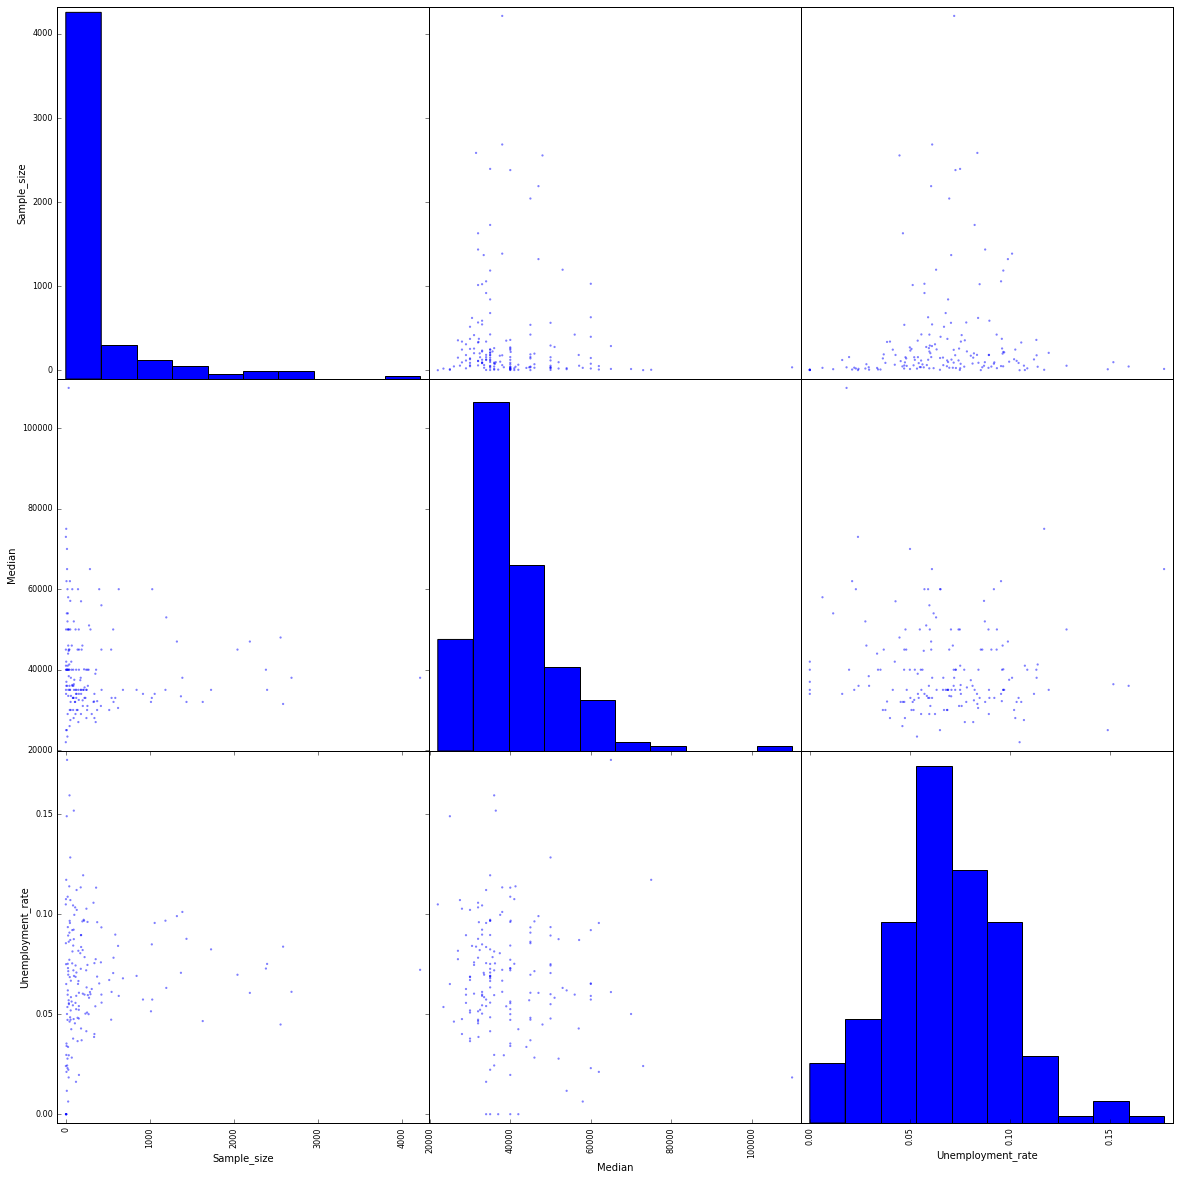

In [25]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce13e37dd8>,
      dtype=object)

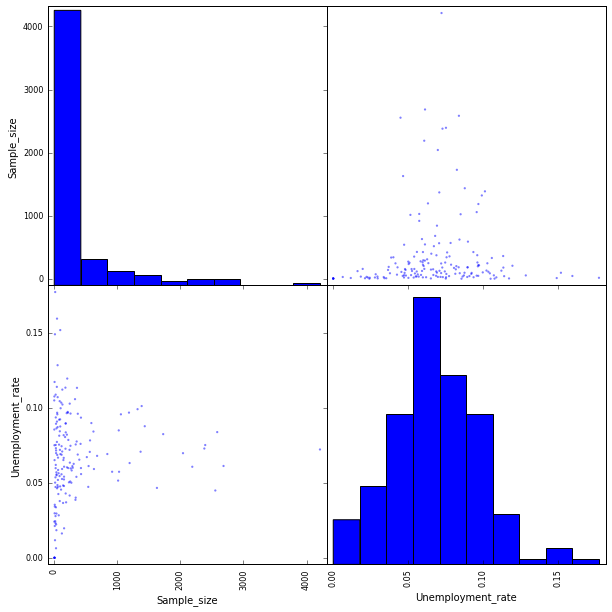

In [26]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce12463470>,
      dtype=object)

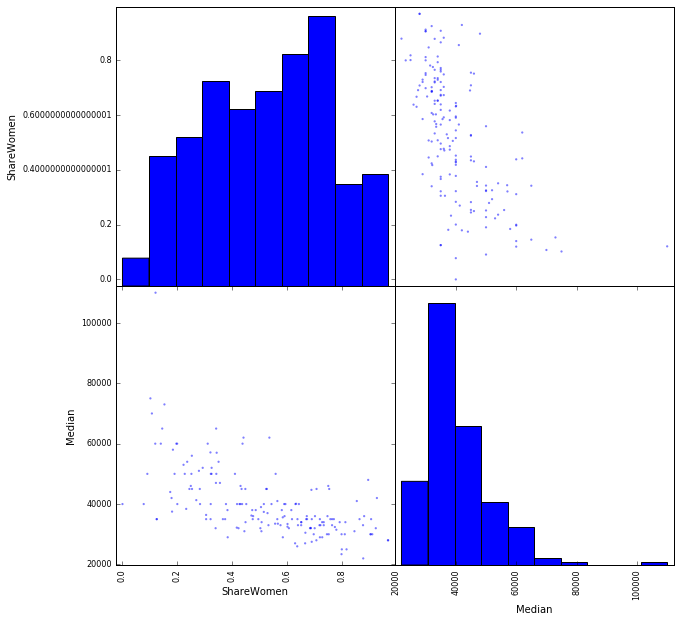

In [27]:
pd.plotting.scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10,10))

## Bar plots

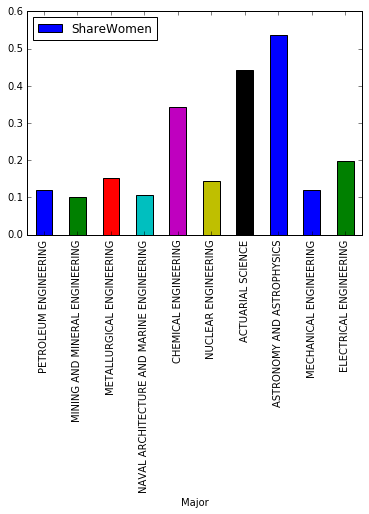

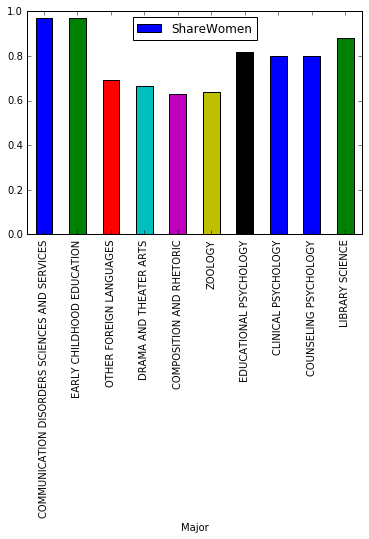

In [28]:
ax1 = recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
ax2 = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

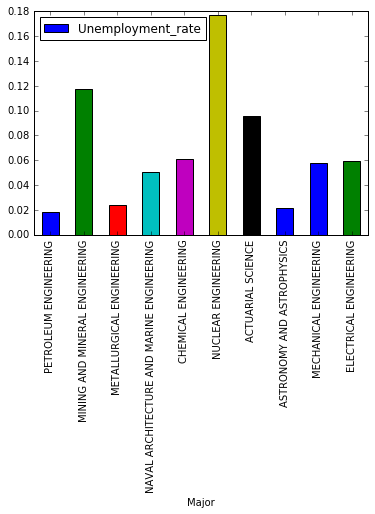

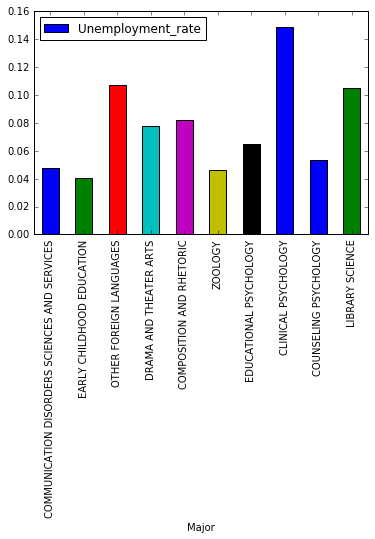

In [29]:
ax1 = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
ax2 = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

## Box plot

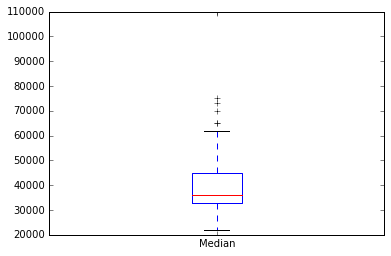

In [30]:
recent_grads['Median'].plot.box()

More than three fouths of the majors have salaries under 5000 dollars. There are a few outliers with salaries above 6000 dollars. Half the majors have median salaries between 3500 and 4500 dollars.

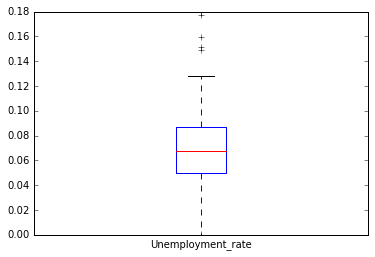

In [31]:
recent_grads['Unemployment_rate'].plot.box()

In [32]:
cat = recent_grads['Major_category'].unique()
print(cat)
men_cat = []
women_cat = []
for c in cat:
    r = recent_grads.loc[recent_grads['Major_category']==c,['Men','Women']]   
    sm = r['Men'].sum()
    sw = r['Women'].sum()
    men_cat.append(sm)
    women_cat.append(sw)
print(men_cat)
print(women_cat)

['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Industrial Arts & Consumer Services' 'Arts'
 'Health' 'Social Science' 'Biology & Life Science' 'Education'
 'Agriculture & Natural Resources' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']
[408307.0, 667852.0, 95390.0, 91129.0, 208725.0, 103781.0, 134390.0, 75517.0, 256834.0, 184919.0, 103526.0, 40357.0, 272846.0, 98115.0, 131921.0, 2817.0]
[129276.0, 634524.0, 90089.0, 87978.0, 90283.0, 126011.0, 222740.0, 387713.0, 273132.0, 268943.0, 455603.0, 35263.0, 440622.0, 382892.0, 260680.0, 9479.0]


In [33]:
df = pd.DataFrame(cat,columns = ['Major_category'])
df['Total_men'] = men_cat
df['Total_women'] = women_cat 
df

,Major_category,Total_men,Total_women
0,Engineering,408307.0,129276.0
1,Business,667852.0,634524.0
2,Physical Sciences,95390.0,90089.0
3,Law & Public Policy,91129.0,87978.0
4,Computers & Mathematics,208725.0,90283.0
5,Industrial Arts & Consumer Services,103781.0,126011.0
6,Arts,134390.0,222740.0
7,Health,75517.0,387713.0
8,Social Science,256834.0,273132.0
9,Biology & Life Science,184919.0,268943.0


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



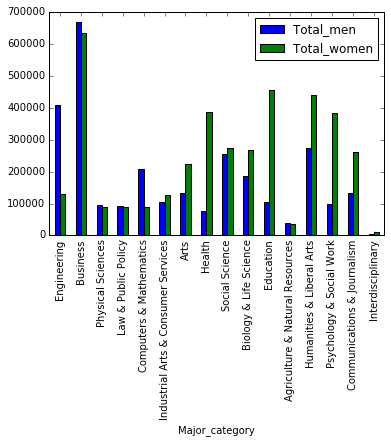

In [38]:
df.columns = ['Major_category', 'Total_men', 'Total_women']
ax = df.plot(x="Major_category", y=["Total_men", "Total_women"], kind="bar")
plt.show()